In [1]:
import pandas as pd
import seaborn as sns

import sys
import pylab
import matplotlib.pyplot as plt
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, manual_tracing, manual_tracing_multiple

numbers = []
# max_num defines number of colonies to look at
max_num = 31
for i in range(max_num):
    numbers.append(i)
numbers.pop(0)
print(numbers)
test = manual_tracing_multiple(numbers)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [2]:
# Load file and get dataframes

import pickle
# pkl_file = open('basin_hopping_iter=150(only-ten)_ten=1e-5_pres=1e-6.pkl', 'rb')
pkl_file = open('new_obj_basin_hopping_iter=150_ten=0.2_pres=0.001.pkl', 'rb')
#pkl_file = open('Bad_node_tracking.pkl','rb')
colonies = pickle.load(pkl_file)

edges_dataframe, cells_dataframe = test.seaborn_plot(None, colonies)

# Inspect dataframe

In [3]:
edges_dataframe

Edge_Labels  Tensions  Time        Radius  \
Index_Edge_Labels Index_Time                                              
0                 1                     0  0.607918     1  4.100876e+02   
                  2                     0  0.541486     2  4.984377e+02   
                  3                     0  0.597176     3  4.829744e+02   
                  4                     0  0.597425     4  6.490298e+02   
                  5                     0  0.564191     5  3.506170e+02   
                  6                     0  0.564216     6  3.397288e+02   
                  7                     0  0.563751     7  7.289934e+02   
                  8                     0  0.562391     8  7.418060e+02   
                  9                     0  0.561743     9  4.792587e+02   
                  10                    0  0.560437    10  4.300577e+02   
                  11                    0  0.579961    11  3.449426e+02   
                  12                    0  0.579222    12  3.324903e+02   
                  13                    0  0.578329    13  3.854108e+02   
                  14                    0  0.584732    14  5.705730e+02   
                  15                    0  0.584432    15  6.878300e+02   
                  16                    0  0.587719    16  1.517780e+06   
                  17                    0  0.575861    17  7.714237e+02   
                  18                    0  0.568408    18  4.313362e+03   
                  19                    0  0.566993    19  2.852564e+02   
                  20                    0  0.579880    20  3.013861e+02   
                  21                    0  0.617769    21  5.460980e+02   
                  22                    0  0.613690    22  3.863868e+05   
                  23                    0  0.566105    23  4.427346e+05   
                  24                    0  0.540324    24  9.279442e+02   
                  25                    0  0.538714    25  4.838306e+02   
                  26                    0  0.539953    26  1.298353e+05   
                  27                    0  0.538814    27  3.339156e+02   
                  28                    0  0.502403    28  4.199221e+05   
                  29                    0  0.462425    29  2.646483e+02   
                  30                    0  0.467152    30  6.401397e+01   
...                                   ...       ...   ...           ...   
211               30                  211  0.304704    30  2.156495e+05   
212               28                  212  0.240107    28  4.135767e+01   
                  29                  212  0.261793    29  2.567263e+02   
                  30                  212  0.271344    30  4.162577e+01   
213               28                  213  0.240217    28  8.073285e+03   
214               28                  214  0.300752    28  2.615675e+02   
                  29                  214  0.272921    29  1.371283e+02   
215               28                  215  0.270926    28  4.425576e+05   
207               28                  207  0.084388    28  1.098900e+03   
216               28                  216  0.285912    28  2.249575e+01   
                  29                  216  0.242466    29  8.693783e+03   
                  30                  216  0.162551    30  3.264236e+03   
217               28                  217  0.497634    28  4.623907e+02   
                  29                  217  0.436566    29  2.556072e+01   
                  30                  217  0.416279    30  5.127666e+01   
205               28                  205  0.294348    28  4.826778e+02   
208               28                  208  0.461652    28  1.430054e+01   
209               28                  209  0.276560    28  2.920440e+02   
                  29                  209  0.321421    29  5.185693e+02   
                  30                  209  0.222601    30  9.864916e+05   
218               29                  218  0.162524    

# Lets try different seaborn plots

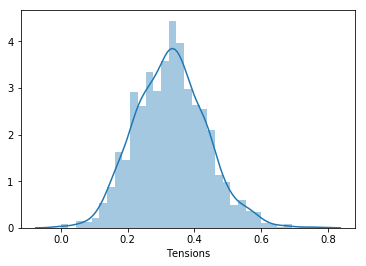

In [5]:
# Plot distributions of a column

import seaborn as sns
sns.distplot(edges_dataframe.Tensions.dropna())

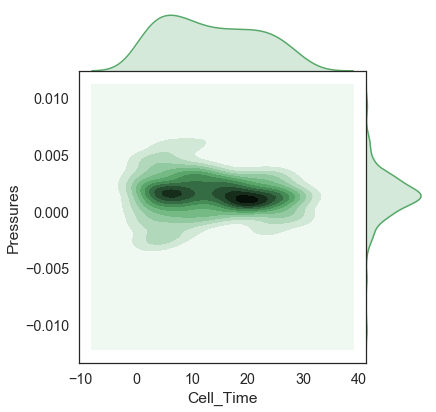

In [41]:
# Joint plot

sns.jointplot(data=cells_dataframe, x='Cell_Time', y='Pressures', kind='kde',space = 0, color='g')
plt.show()

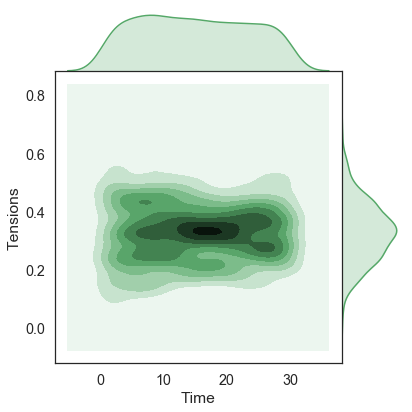

In [49]:
# Joint plot

sns.jointplot(data=edges_dataframe, x='Time', y='Tensions', kind='kde',space = 0, color='g')
plt.show()

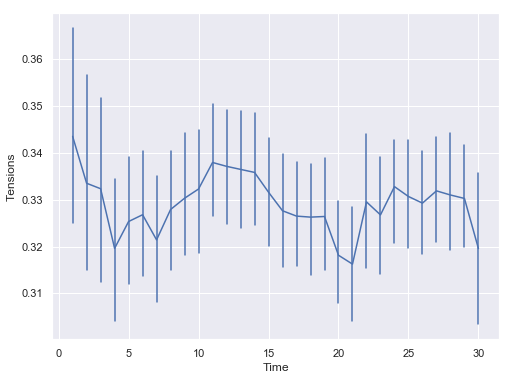

In [23]:
# Line plot


sns.set(style="darkgrid")


fig, ax = plt.subplots(1,1,figsize = (8,6))
sns.lineplot(x = 'Time', y = 'Tensions', err_style="bars", ci=68, data = edges_dataframe)

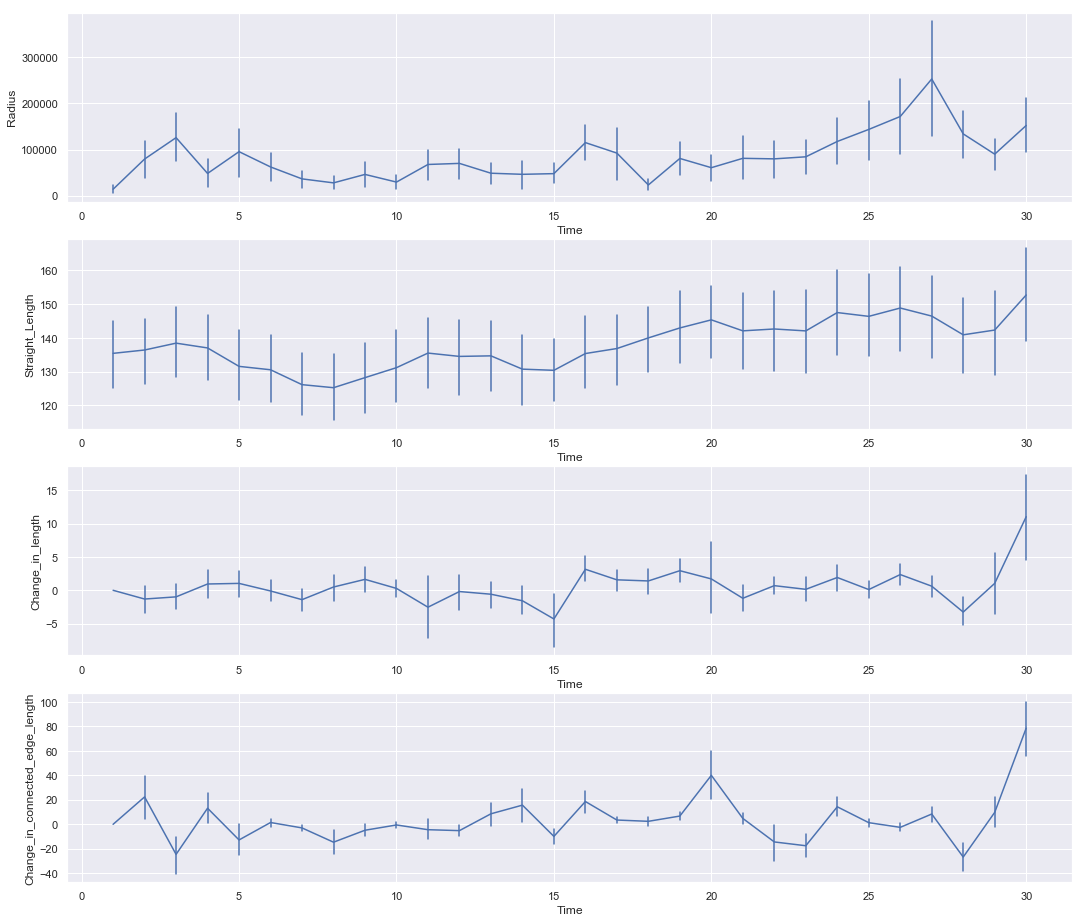

In [4]:
# Line plot


sns.set(style="darkgrid")


fig, (ax, ax1, ax2, ax3) = plt.subplots(4,1,figsize = (18,16))
sns.lineplot(ax = ax, x = 'Time', y = 'Radius', err_style="bars", ci=68, data = edges_dataframe)
sns.lineplot(ax = ax1, x = 'Time', y = 'Straight_Length', err_style="bars", ci=68, data = edges_dataframe)
sns.lineplot(ax = ax2, x = 'Time', y = 'Change_in_length', err_style="bars", ci=68, data = edges_dataframe)
sns.lineplot(ax = ax3, x = 'Time', y = 'Change_in_connected_edge_length', err_style="bars", ci=68, data = edges_dataframe)

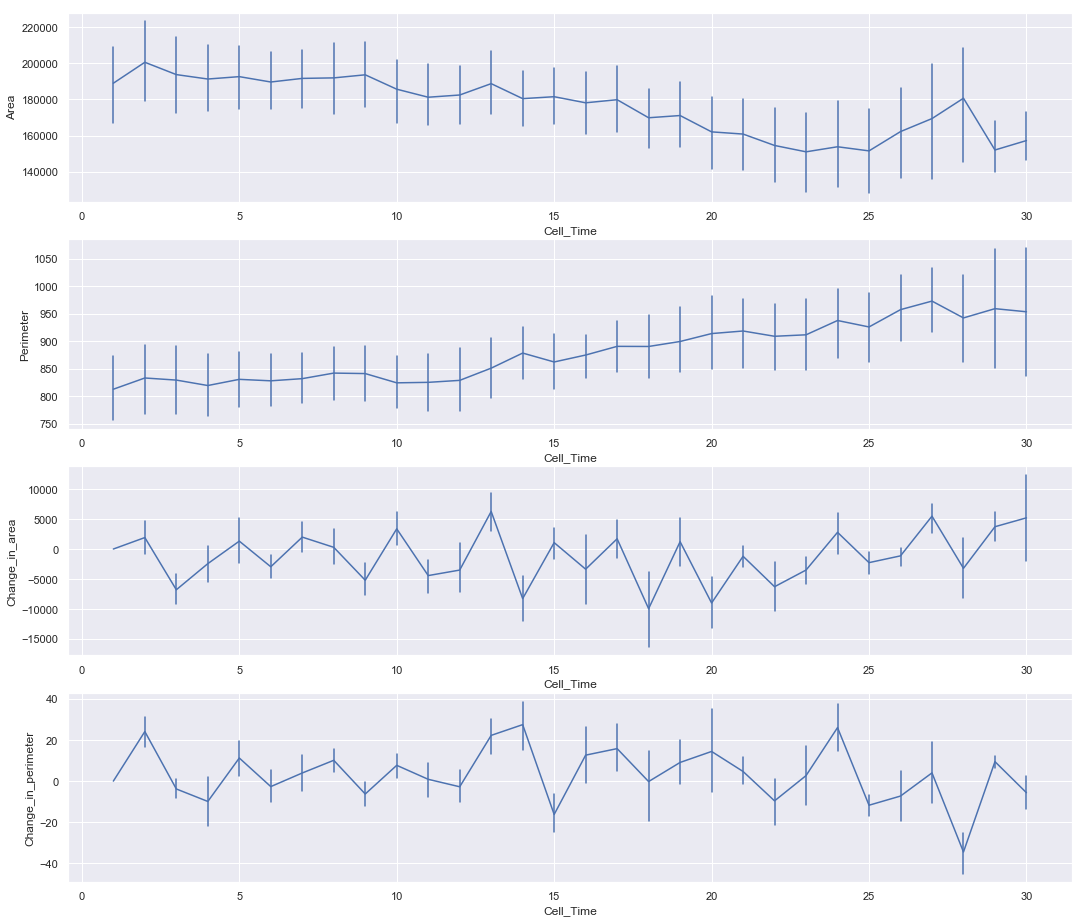

In [43]:
# Line plot


sns.set(style="darkgrid")


fig, (ax, ax1, ax2, ax3) = plt.subplots(4,1,figsize = (18,16))
sns.lineplot(ax = ax, x = 'Cell_Time', y = 'Area', err_style="bars", ci=68, data = cells_dataframe)
sns.lineplot(ax = ax1, x = 'Cell_Time', y = 'Perimeter', err_style="bars", ci=68, data = cells_dataframe)
sns.lineplot(ax = ax2, x = 'Cell_Time', y = 'Change_in_area', err_style="bars", ci=68, data = cells_dataframe)
sns.lineplot(ax = ax3, x = 'Cell_Time', y = 'Change_in_perimeter', err_style="bars", ci=68, data = cells_dataframe)

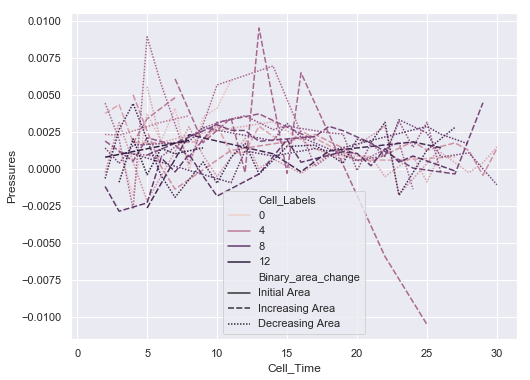

In [70]:
# Line plot


sns.set(style="darkgrid")


fig, ax = plt.subplots(1,1,figsize = (8,6))
sns.lineplot(x = 'Cell_Time', y = 'Pressures',hue = 'Cell_Labels', style = "Binary_area_change",data = cells_dataframe)

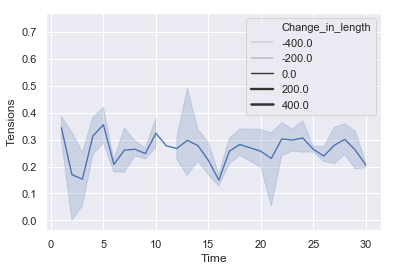

In [21]:
from matplotlib.colors import LogNorm

# ax = sns.lineplot(x="Time", y="Tensions",
#                   hue="Straight_Length",
#                   hue_norm=LogNorm(), data=edges_dataframe)
palette = sns.color_palette("mako_r")
ax = sns.lineplot(x="Time", y="Tensions",
                  size="Change_in_length",
                  sizes=(.25, 2.5), data=edges_dataframe)

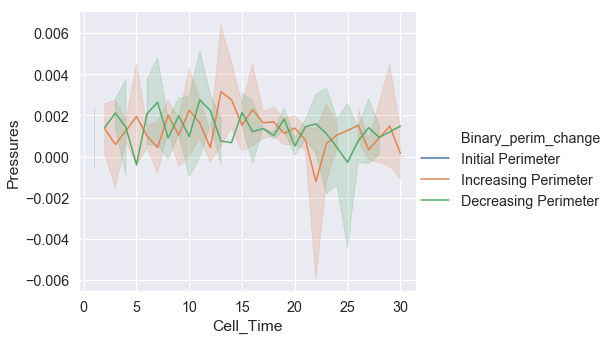

In [9]:
# Relplot

sns.set_context("paper")
sns.set(font_scale=1.3)
sns.set_style("darkgrid")

g = sns.relplot( x="Cell_Time", y="Pressures", hue = "Binary_perim_change",
            facet_kws=dict(sharex=False), 
            kind="line", legend ='brief', aspect = 1.3, data=cells_dataframe);
# g.set(ylim = [0.3,0.4])
plt.show()

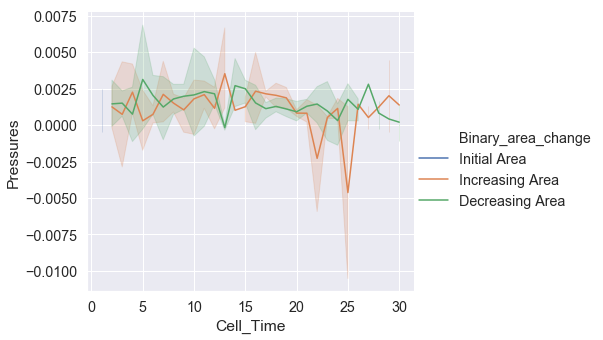

In [10]:
# Relplot

sns.set_context("paper")
sns.set(font_scale=1.3)
sns.set_style("darkgrid")

g = sns.relplot( x="Cell_Time", y="Pressures", hue = "Binary_area_change",
            facet_kws=dict(sharex=False), 
            kind="line", legend ='brief', aspect = 1.3, data=cells_dataframe);
# g.set(ylim = [0.3,0.4])
plt.show()

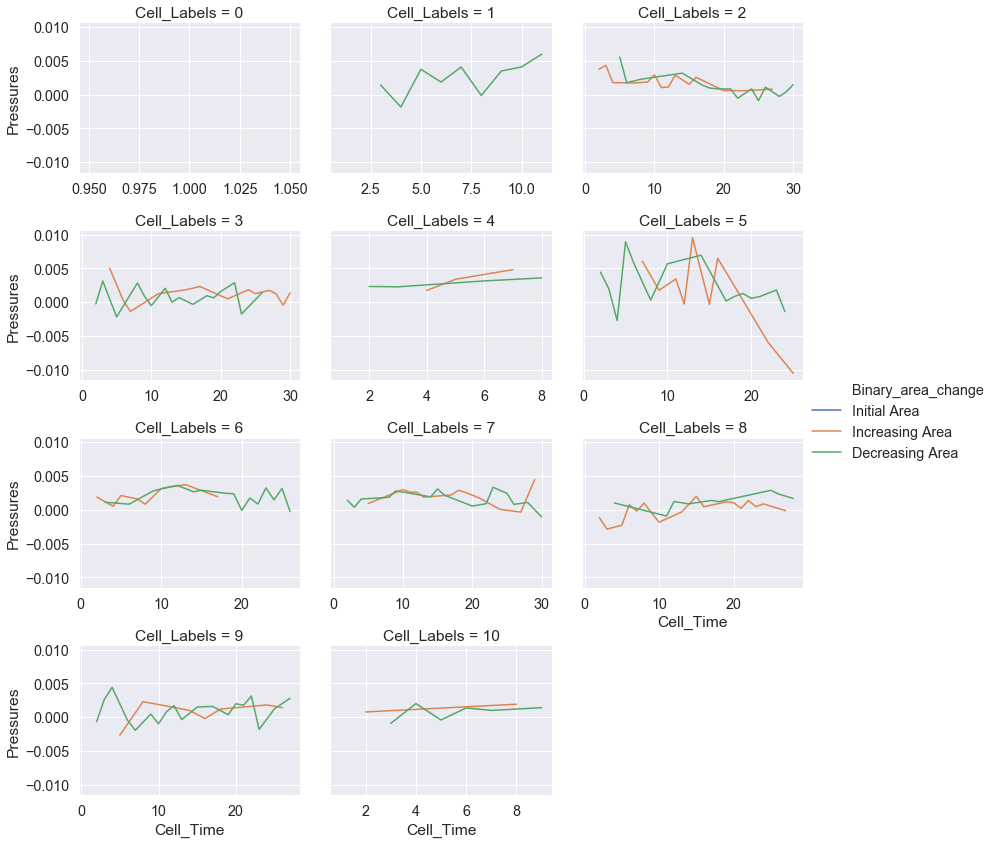

In [14]:
# Relplot

sns.set_context("paper")
sns.set(font_scale=1.3)
sns.set_style("darkgrid")

g = sns.relplot( x="Cell_Time", y="Pressures", col = 'Cell_Labels', col_wrap=3, height = 3, hue = "Binary_area_change",
            facet_kws=dict(sharex=False), 
            kind="line", legend ='brief', aspect = 1.3, data=cells_dataframe);
# g.set(ylim = [0.3,0.4])
plt.show()

# Group By

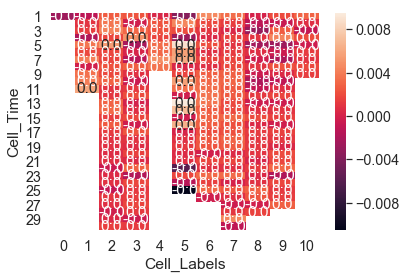

In [63]:
#titanic.groupby('sex')[['survived']].mean()

cells_dataframe.groupby(['Cell_Time', 'Cell_Labels'])[['Pressures']].aggregate('mean').unstack()
#titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

# Same as above -> use pivot table

df = cells_dataframe.pivot_table('Pressures', index='Cell_Time', columns='Cell_Labels')
g = sns.heatmap(df, annot=True, fmt=".1f")

plt.show()

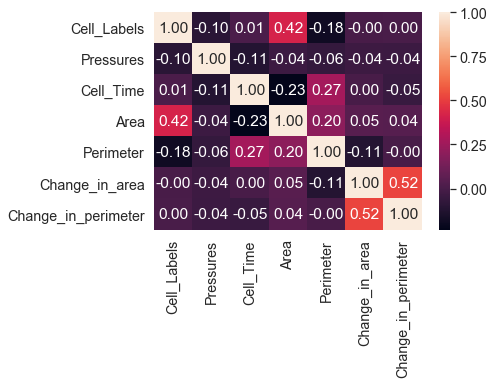

In [64]:
sns.heatmap(cells_dataframe.corr(), annot=True, fmt=".2f")
plt.show()

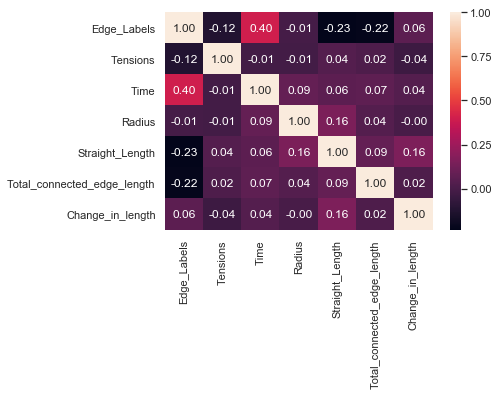

In [13]:
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("darkgrid")

sns.heatmap(edges_dataframe.corr(), annot=True, fmt=".2f")
plt.show()

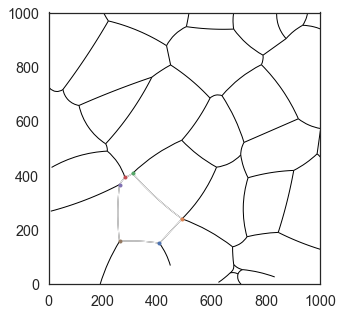

In [34]:

sns.set_style("white")
fig, ax = plt.subplots(1,1, figsize = (8,5))
ax.set(xlim = [0,1000], ylim = [0,1000],aspect = 1)
cells = colonies['15'].cells
edges = colonies['15'].tot_edges
[e.plot(ax, lw = 1, color = 'black') for e in edges]
[c.plot(ax) for c in cells if c.label == 5]
plt.show()

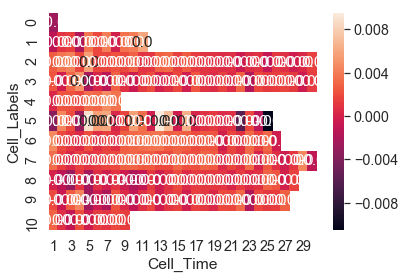

In [52]:
import numpy as np
df = cells_dataframe.pivot_table(index='Cell_Labels', columns='Cell_Time', values='Pressures', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

# Catplots

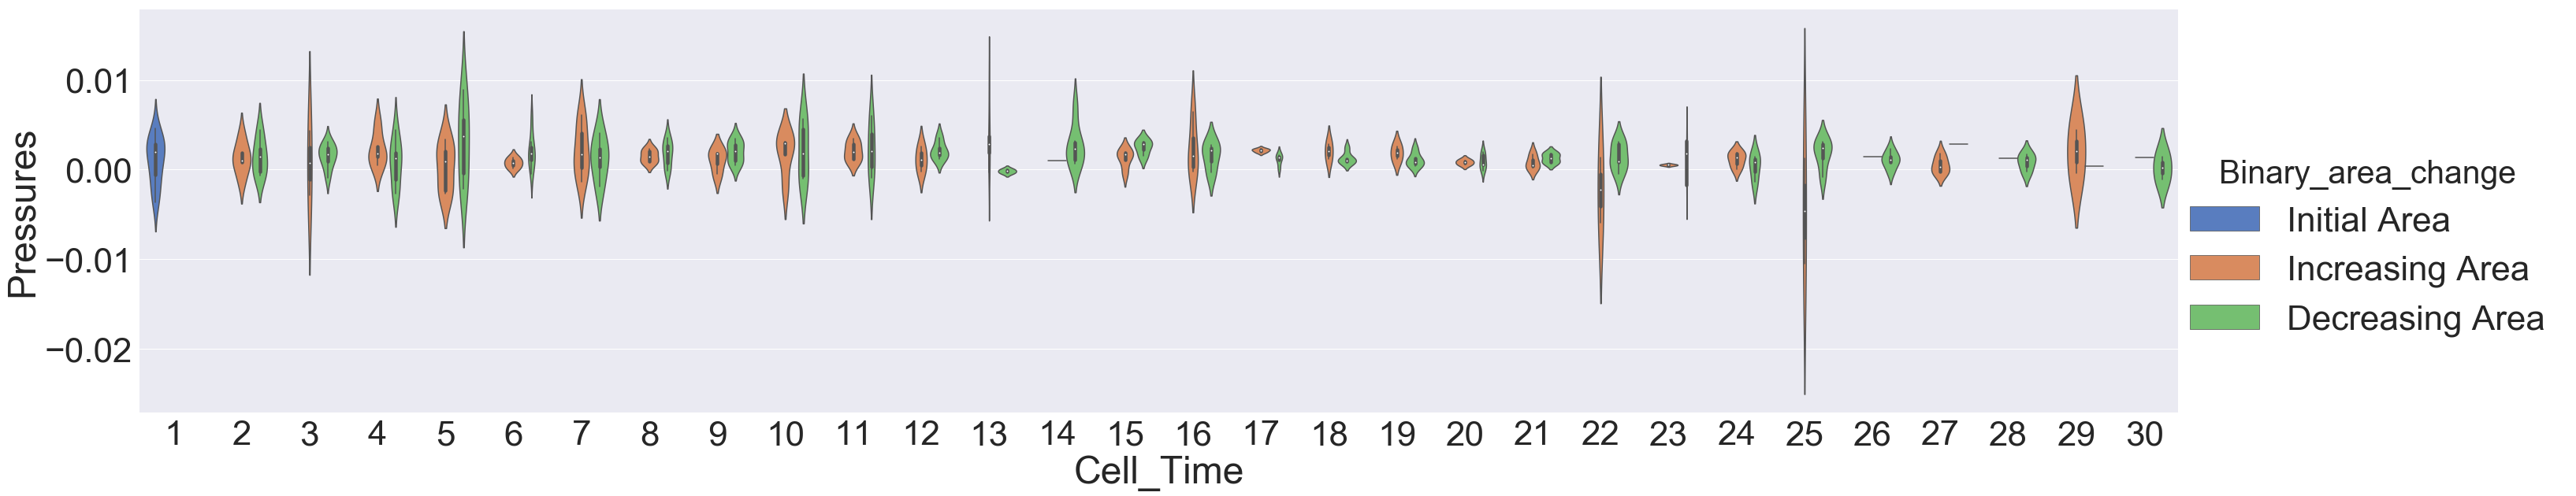

In [102]:
# Draw a nested barplot to show survival for class and sex
sns.set_context("paper")
sns.set(font_scale=4)
sns.set_style("darkgrid")

g = sns.catplot(x="Cell_Time", y="Pressures", hue="Binary_area_change", data=cells_dataframe,
                height=10, kind="violin", palette="muted", aspect = 4)
g.despine(left=True)
# g.fig.set_size_inches(15,15)
# g.set_ylabels("survival probability")

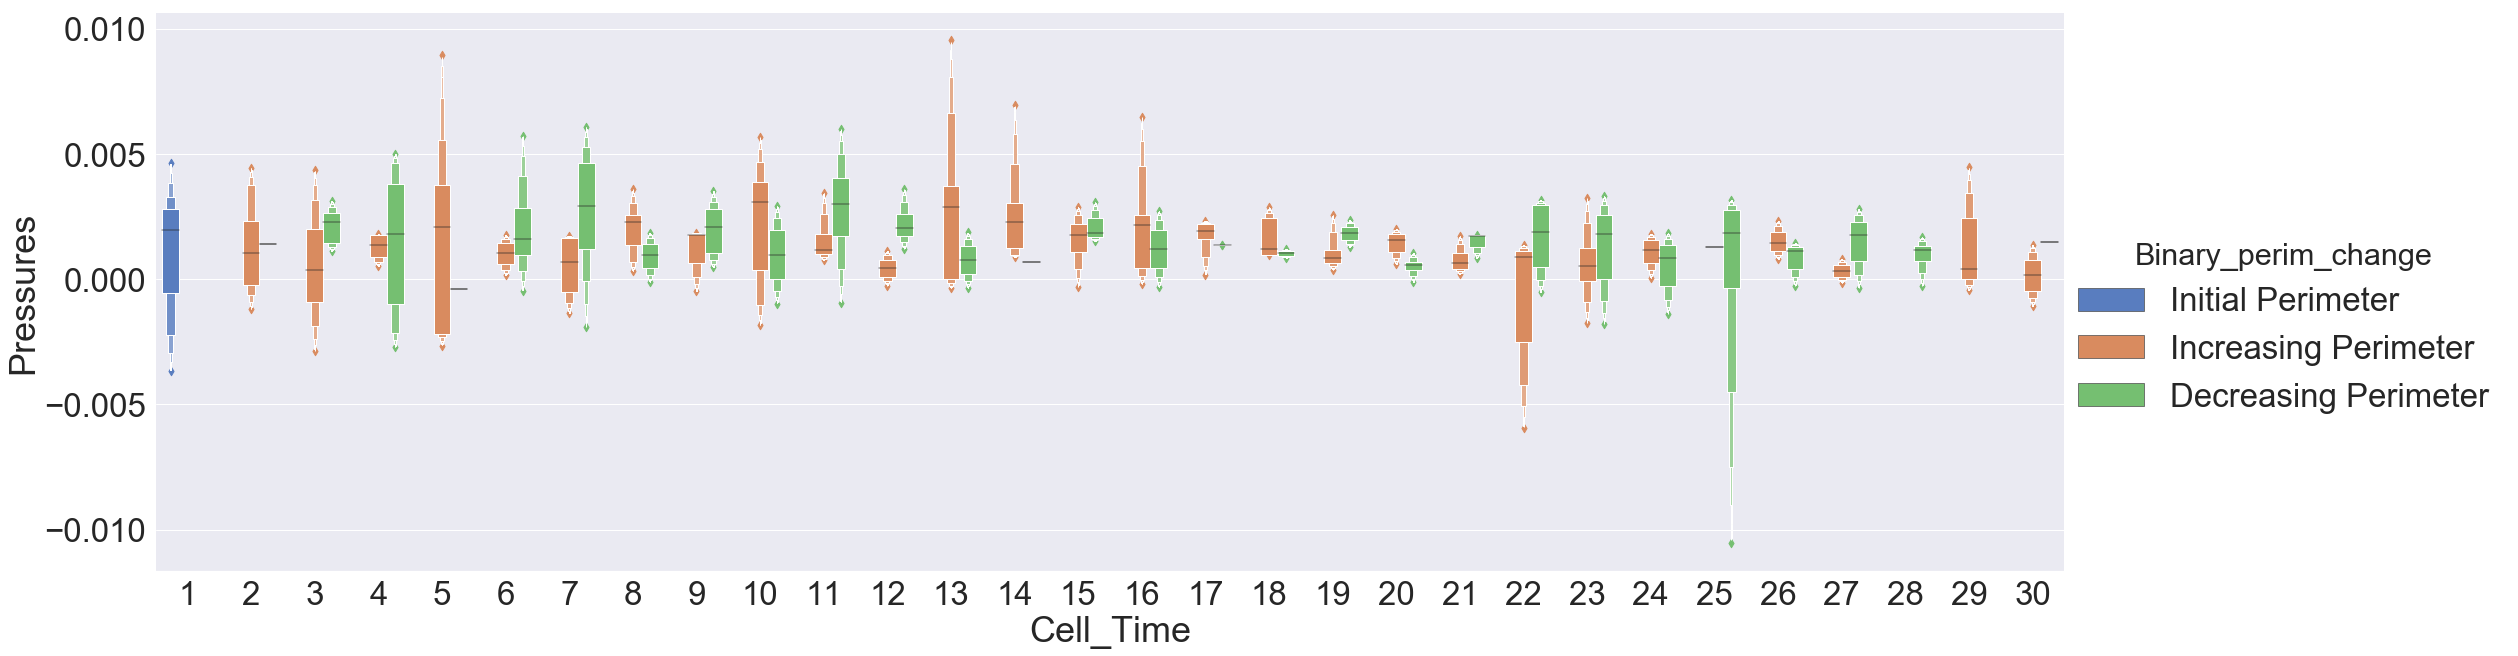

In [7]:
sns.set_context("paper")
sns.set(font_scale=3)
sns.set_style("darkgrid")

g = sns.catplot(x="Cell_Time", y="Pressures", hue="Binary_perim_change", data=cells_dataframe,
                height=10, kind="boxen", palette="muted", aspect = 3)
g.despine(left=True)

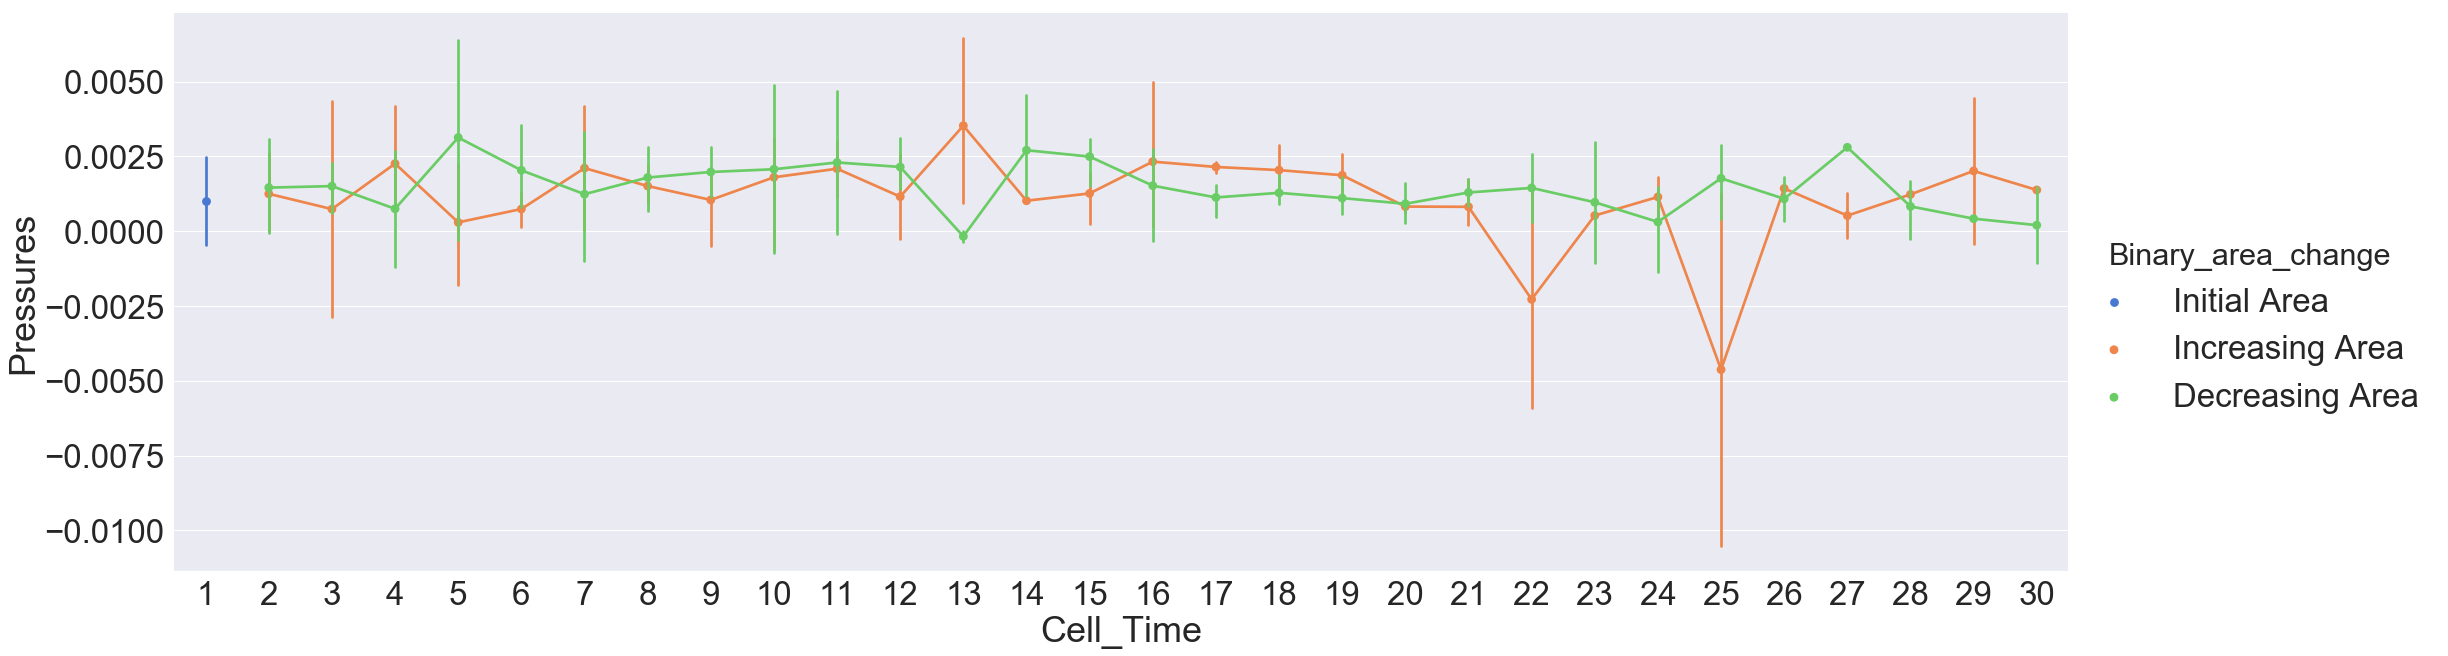

In [111]:
sns.set_context("paper")
sns.set(font_scale=3)
sns.set_style("darkgrid")

g = sns.catplot(x="Cell_Time", y="Pressures", hue="Binary_area_change", data=cells_dataframe,
                height=10, kind="point", palette="muted", aspect = 3)
g.despine(left=True)

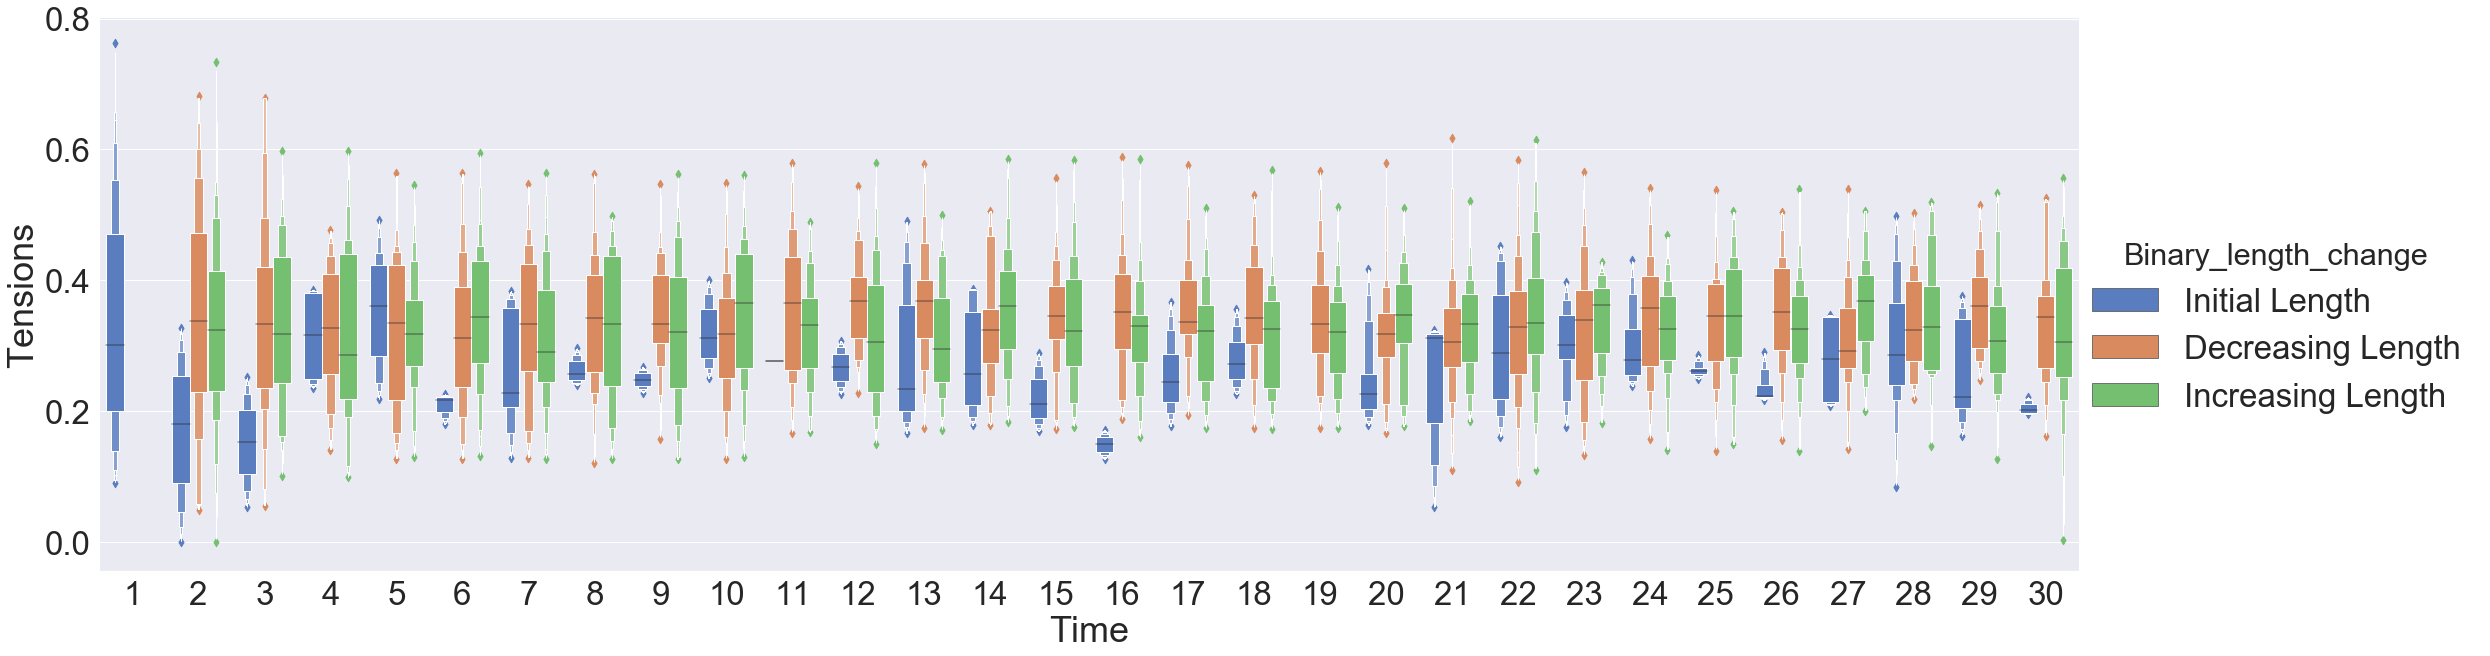

In [113]:
sns.set_context("paper")
sns.set(font_scale=3)
sns.set_style("darkgrid")

g = sns.catplot(x="Time", y="Tensions", hue="Binary_length_change", data=edges_dataframe,
                height=10, kind="boxen", palette="muted", aspect = 3)
g.despine(left=True)

In [ ]:
sns.set_context("paper")
sns.set(font_scale=3.4)
sns.set_style("darkgrid")

g = sns.catplot(x="Time", y="Tensions", hue="Binary_connected_length_change", data=edges_dataframe,
                height=10, kind="boxen", palette="muted", aspect = 3.5)
g.despine(left=True)

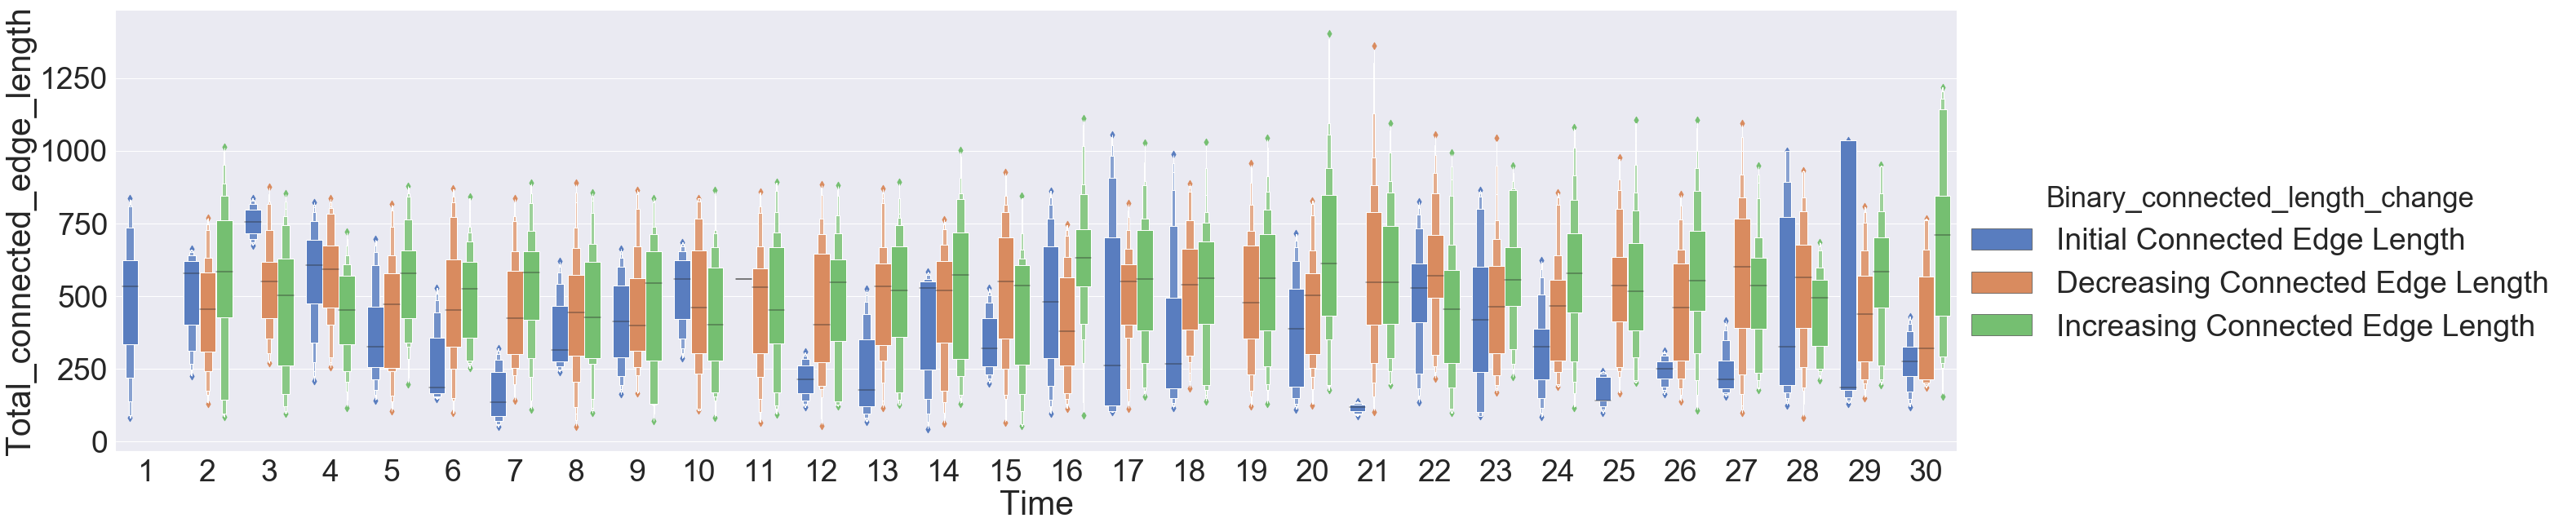

In [5]:
sns.set_context("paper")
sns.set(font_scale=3.4)
sns.set_style("darkgrid")

g = sns.catplot(x="Time", y="Total_connected_edge_length",hue = 'Binary_connected_length_change', data=edges_dataframe,
                height=10, kind="boxen", palette="muted", aspect = 3.5)
g.despine(left=True)

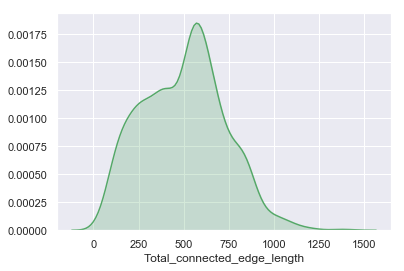

In [9]:
sns.set_context("paper")
sns.set(font_scale=1)
sns.set_style("darkgrid")

sns.distplot(edges_dataframe['Total_connected_edge_length'], hist=False, color="g", kde_kws={"shade": True})

# Bar plots

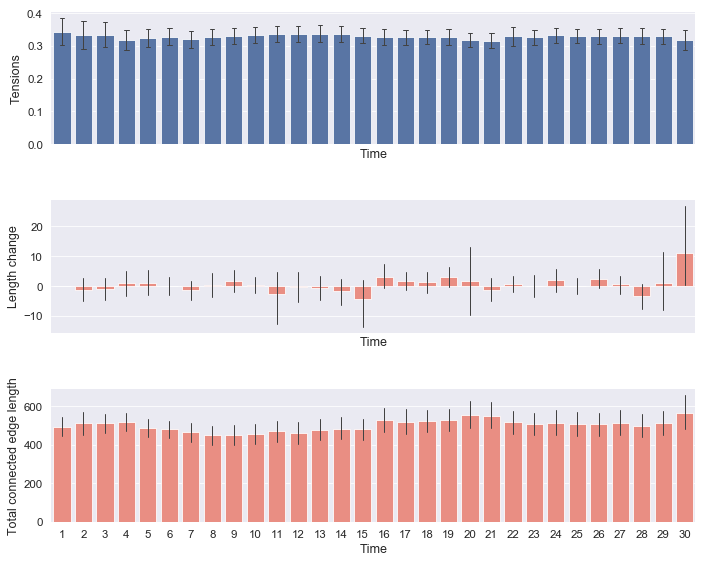

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="darkgrid", context="paper", font_scale = 1.3)



# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Generate some sequential data

x = edges_dataframe['Time']
y1 = edges_dataframe['Tensions']
sns.barplot(x=x, y=y1,label = x, color = 'b',errwidth=1,capsize = 0.2, ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Tensions")

# Center the data to make it diverging
y2 = edges_dataframe['Change_in_length']
sns.barplot(x=x, y=y2, color="salmon",errwidth = 1, ax=ax2)
# ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Length change")

# Randomly reorder the data to make it qualitative
y3 = edges_dataframe['Total_connected_edge_length']
sns.barplot(x=x, y=y3, color="salmon",errwidth = 1, ax=ax3)
# ax2.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Total connected edge length")


# Finalize the plot
sns.despine(left=True, bottom=True)
# plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)


# Pair plots

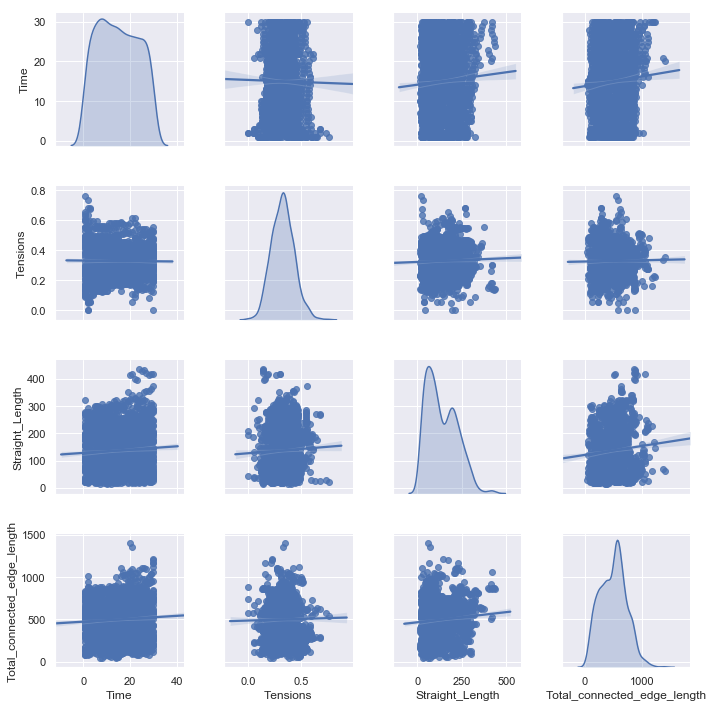

In [28]:
g = sns.pairplot(edges_dataframe, vars=["Time", "Tensions", "Straight_Length", "Total_connected_edge_length"],kind="reg", diag_kind="kde")

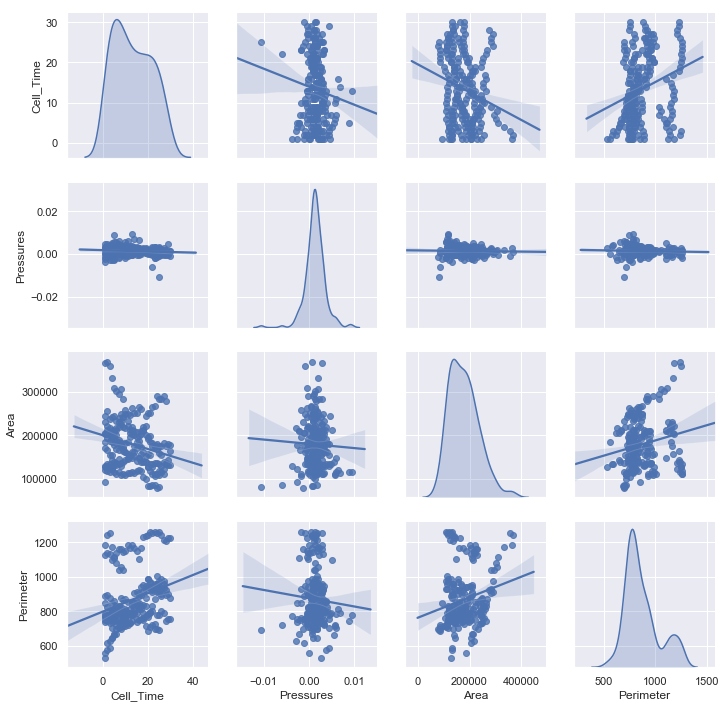

In [29]:
g = sns.pairplot(cells_dataframe, vars=["Cell_Time", "Pressures", "Area", "Perimeter"],kind="reg", diag_kind="kde")

In [10]:
import random
for x in range(10):
  print(random.randint(0,101)/100)

0.15
0.0
0.28
0.72
0.71
0.45
0.7
0.31
0.32
0.02
